Welcome to JupyROOT 6.08/05

Confusion matrix

Example of confusion matrix usage to evaluate the quality
of the output of a classifier on the iris data set. The
diagonal elements represent the number of points for which
the predicted label is equal to the true label, while
off-diagonal elements are those that are mislabeled by the
classifier. The higher the diagonal values of the confusion
matrix the better, indicating many correct predictions.

The figures show the confusion matrix with and without
normalization by class support size (number of elements
in each class). This kind of normalization can be
interesting in case of class imbalance to have a more
visual interpretation of which class is being misclassified.

Here the results are not as good as they could be as our
choice for the regularization parameter C was not the best.
In real life applications this parameter is usually chosen
using :ref:`grid_search`.


Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0 

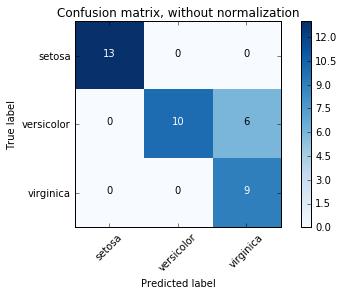

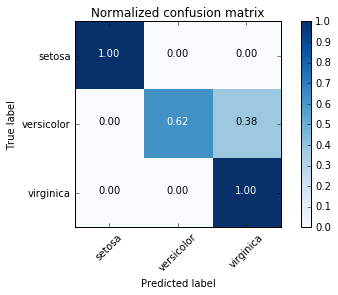

In [1]:
from ROOT import TFile
from root_numpy import tree2array
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics, preprocessing
from plot_confusion_matrix import plot_confusion_matrix
import copy

In [2]:
fileWW = TFile("out_WWall.root", "READ")
fileZZ = TFile("out_ZZall.root", "READ")
fileHH = TFile("out_HHall.root", "READ")
fileTT = TFile("out_TTall.root", "READ")
fileJJ = TFile("out_QCDall.root", "READ")
treeWW = fileWW.Get("jetTree")
treeZZ = fileZZ.Get("jetTree")
treeHH = fileHH.Get("jetTree")
treeTT = fileTT.Get("jetTree")
treeJJ = fileJJ.Get("jetTree")

In [3]:
vars = []
for branch in treeWW.GetListOfBranches():
    name = branch.GetName()
    if 'Njets' in name:
        continue
    if 'target' in name:
        continue
    if 'NNout' in name:
        continue
    if 'sum' in name:
        continue
    if 'gen' in name:
        continue
    if 'flatten' in name:
        continue
    if 'dist' in name:
        continue
    if 'npv' in name:
        continue
    if 'sorting' in name:
        continue
    if name == 'mass':
        continue
    if name == 'minDist':
        continue
    if 'et' in name:
        continue
    vars.append(name)

In [4]:
sel = "tau32 < 9999. && et > 500. && et < 2500."
treeVars = vars
arrayWW = tree2array(treeWW, treeVars, sel)
arrayZZ = tree2array(treeZZ, treeVars, sel)
arrayHH = tree2array(treeHH, treeVars, sel)
arrayTT = tree2array(treeTT, treeVars, sel)
arrayJJ = tree2array(treeJJ, treeVars, sel)

In [5]:
newArrayWW = []
newArrayZZ = []
newArrayHH = []
newArrayTT = []
newArrayJJ = []
for entry in arrayWW[:]:
    a = list(entry)
    newArrayWW.append(a)
for entry in arrayZZ[:]:
    a = list(entry)
    newArrayZZ.append(a)
for entry in arrayHH[:]:
    a = list(entry)
    newArrayHH.append(a)
for entry in arrayTT[:]:
    a = list(entry)
    newArrayTT.append(a)
for entry in arrayJJ[:]:
    a = list(entry)
    newArrayJJ.append(a)
arrayWW = copy.copy(newArrayWW)
arrayZZ = copy.copy(newArrayZZ)
arrayHH = copy.copy(newArrayHH)
arrayTT = copy.copy(newArrayTT)
arrayJJ = copy.copy(newArrayJJ)





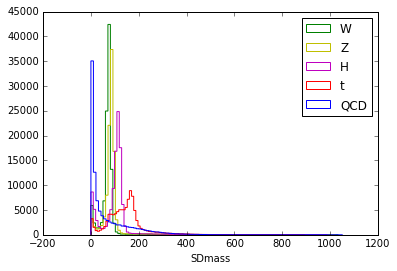

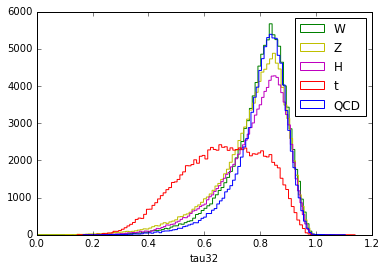

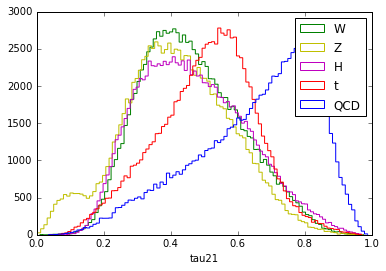

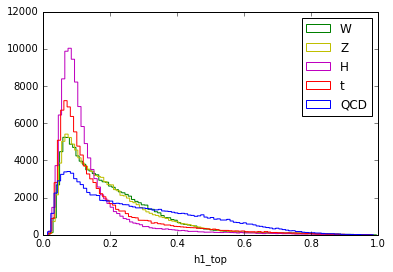

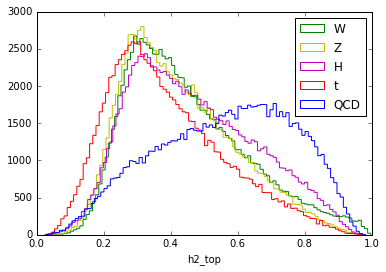

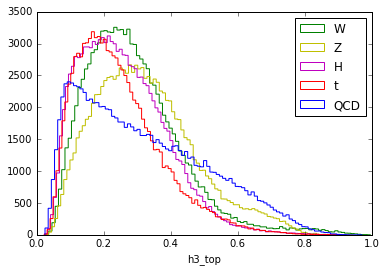

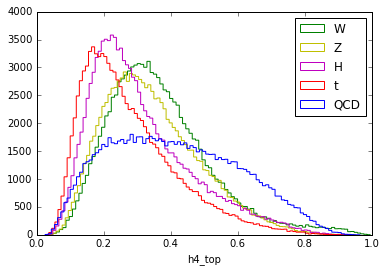

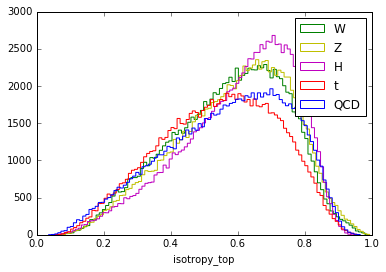

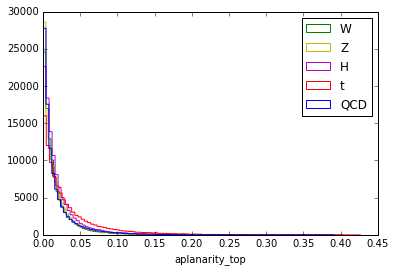

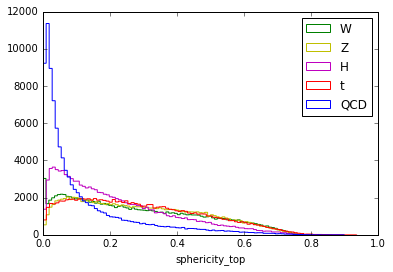

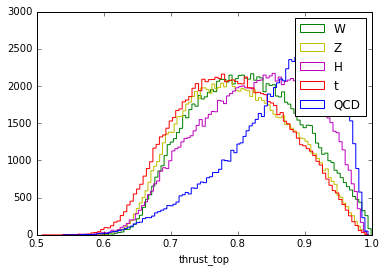

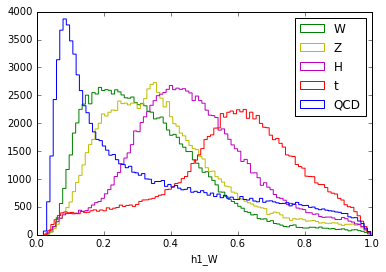

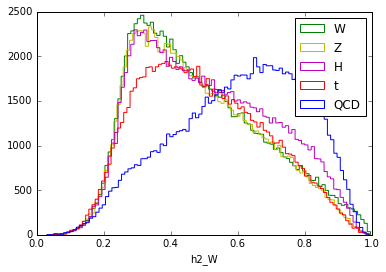

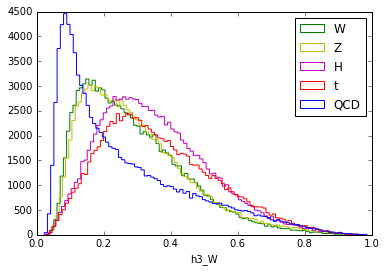

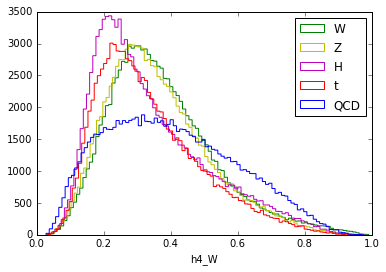

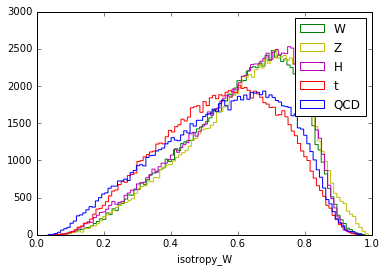

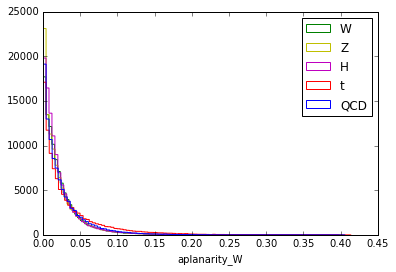

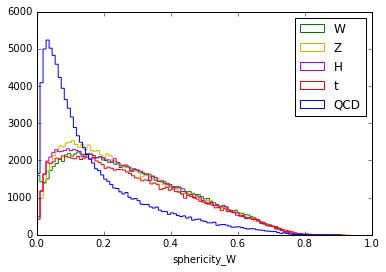

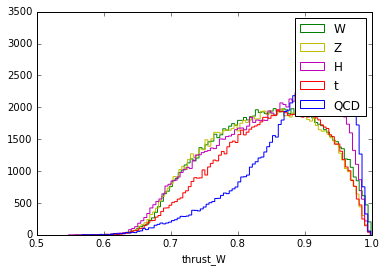

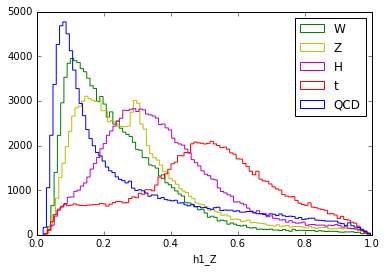

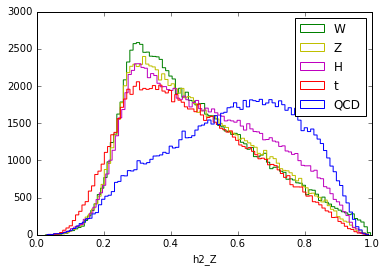

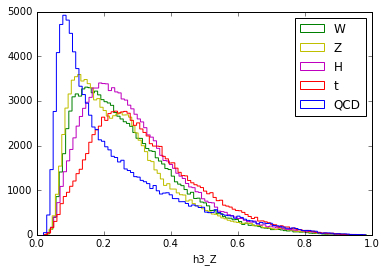

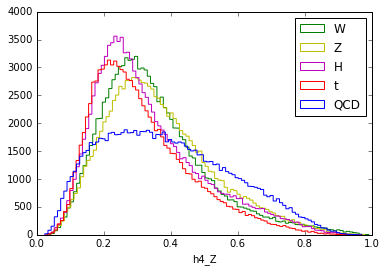

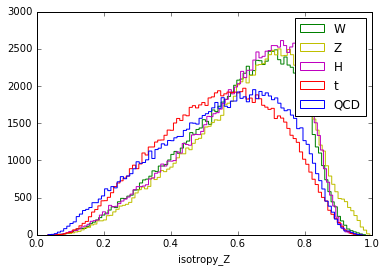

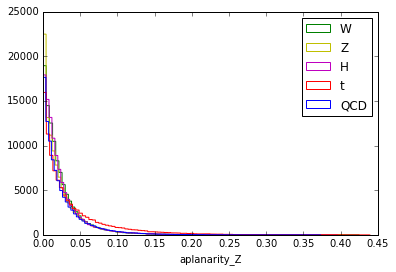

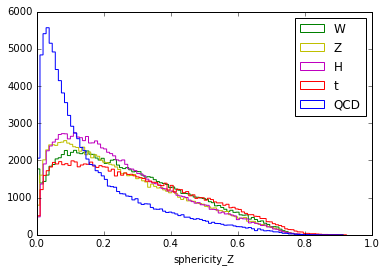

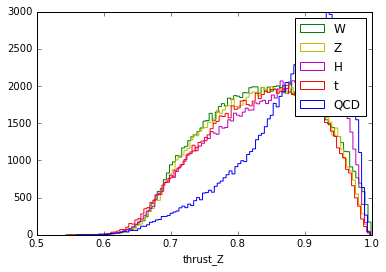

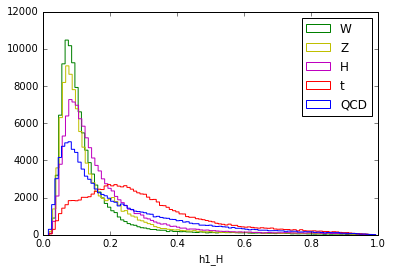

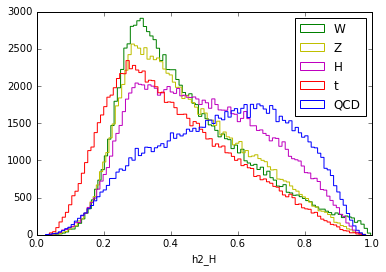

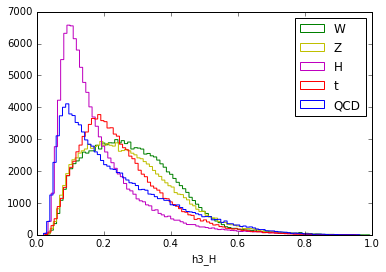

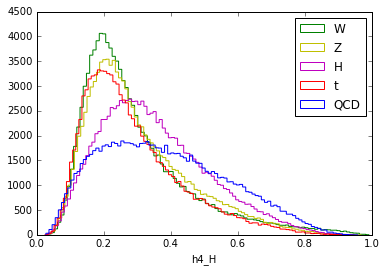

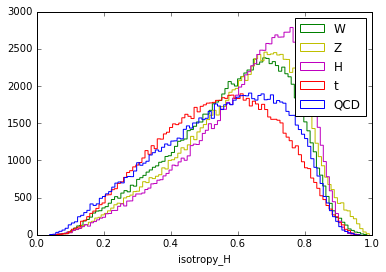

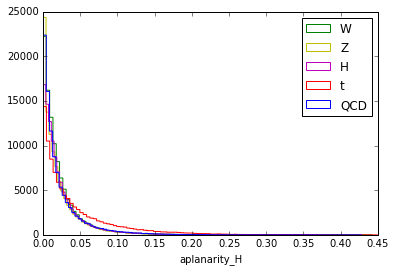

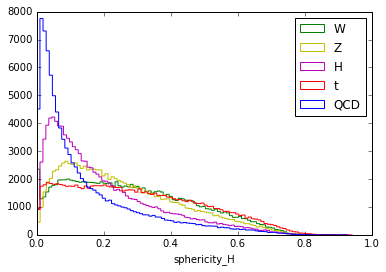

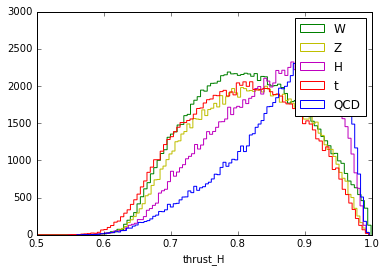

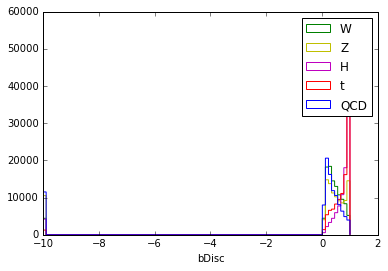

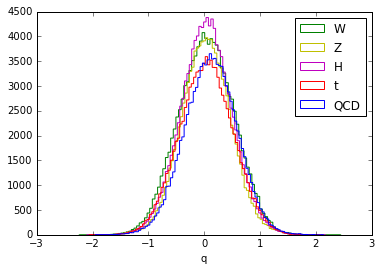

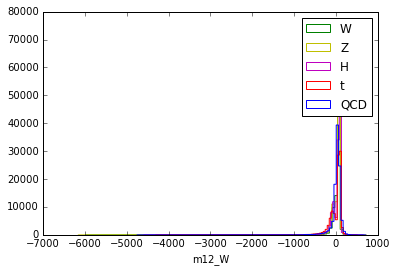

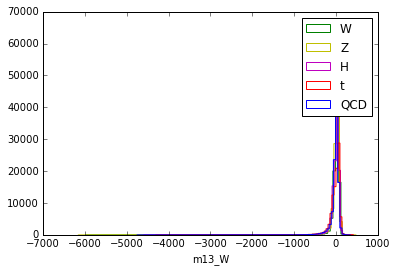

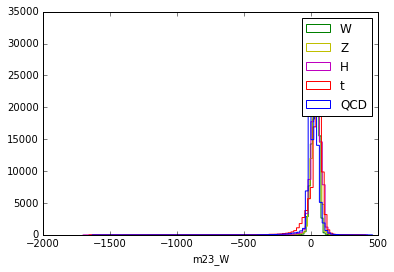

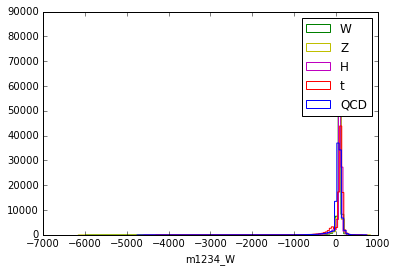

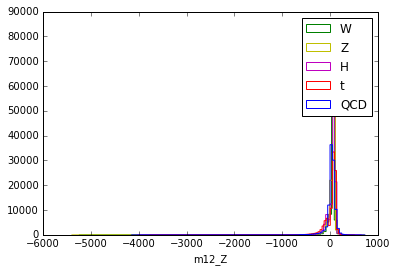

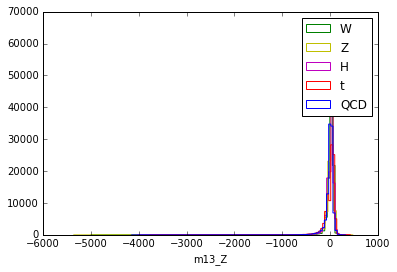

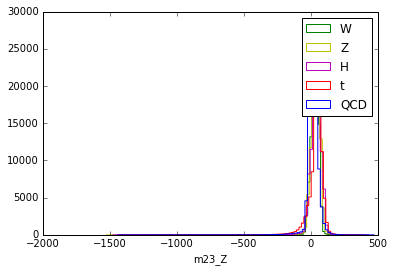

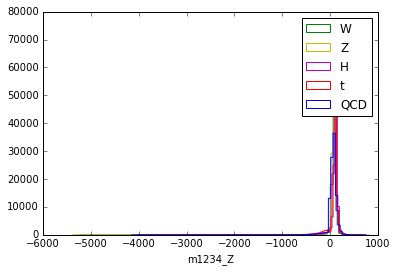

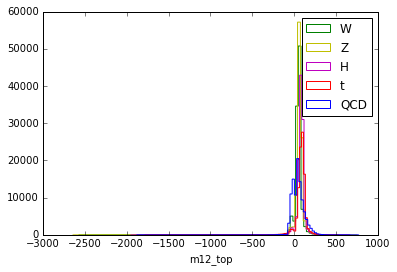

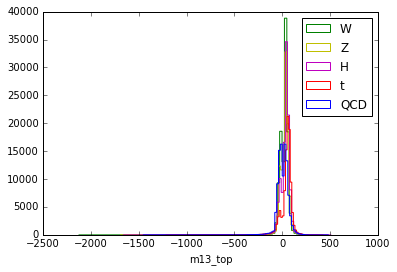

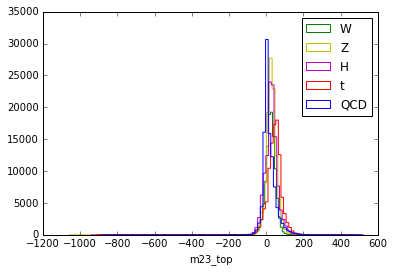

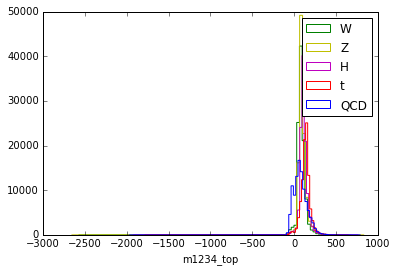

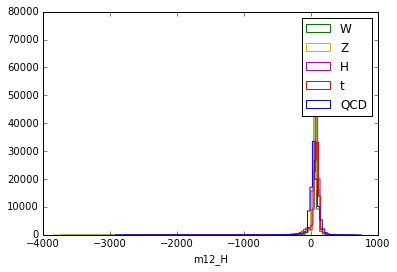

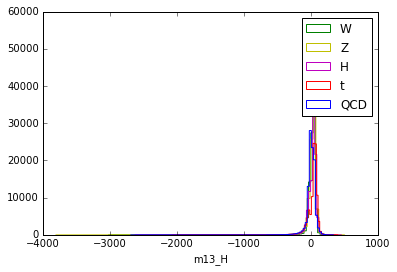

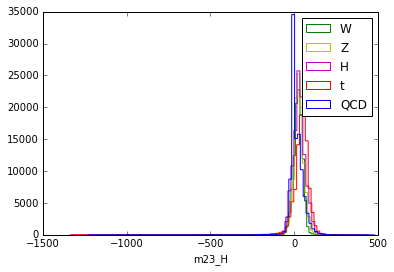

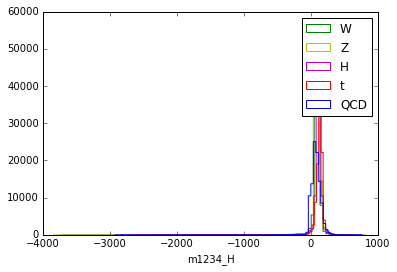

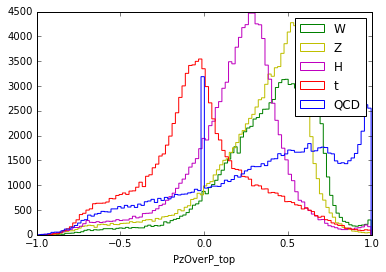

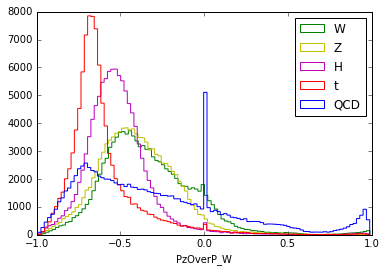

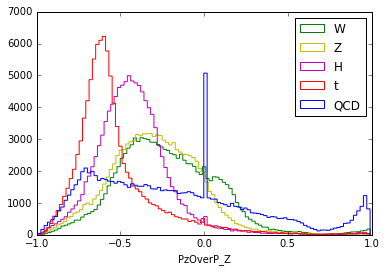

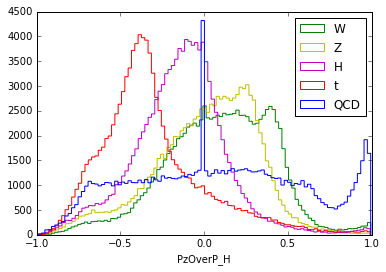

In [6]:
histsWW = np.array(arrayWW).T
histsZZ = np.array(arrayZZ).T
histsHH = np.array(arrayHH).T
histsTT = np.array(arrayTT).T
histsJJ = np.array(arrayJJ).T


for index, hist in enumerate(histsWW):
    plt.figure()
    plt.hist(hist, bins=100, color='g', label='W', histtype='step')
    plt.hist(histsZZ[index], bins=100, color='y', label='Z', histtype='step')
    plt.hist(histsHH[index], bins=100, color='m', label='H', histtype='step')
    plt.hist(histsTT[index], bins=100, color='r', label='t', histtype='step')
    plt.hist(histsJJ[index], bins=100, color='b', label='QCD', histtype='step')
    plt.xlabel(vars[index])
    plt.legend()
    plt.show()
    plt.close()

In [7]:
#randomize dataset
import random

trainData = []
targetData = []
nEvents = len(newArrayWW) + len(newArrayZZ) + len(newArrayHH) + len(newArrayTT) + len(newArrayJJ)
print nEvents
while nEvents > 0:
    rng = random.randint(0,4)
    if (rng == 0 and len(newArrayJJ) > 0):
        trainData.append(newArrayJJ.pop())
        targetData.append(0)
        nEvents = nEvents -1
    if (rng == 1 and len(newArrayWW) > 0):
        trainData.append(newArrayWW.pop())
        targetData.append(1)
        nEvents = nEvents - 1
    if (rng == 2 and len(newArrayZZ) > 0):
        trainData.append(newArrayZZ.pop())
        targetData.append(2)
        nEvents = nEvents - 1
    if (rng == 3 and len(newArrayHH) > 0):
        trainData.append(newArrayHH.pop())
        targetData.append(3)
        nEvents = nEvents - 1
    if (rng == 4 and len(newArrayTT) > 0):
        trainData.append(newArrayTT.pop())
        targetData.append(4)
        nEvents = nEvents - 1

528079


In [8]:
#standardize dataset
scaler = preprocessing.StandardScaler().fit(trainData)
trainData = scaler.transform(trainData)
arrayTT = scaler.transform(arrayTT)
arrayWW = scaler.transform(arrayWW)
arrayZZ = scaler.transform(arrayZZ)
arrayHH = scaler.transform(arrayHH)
arrayJJ = scaler.transform(arrayJJ)

In [20]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="log", penalty="l2", verbose=True, n_iter=100)
sgd.fit(trainData[:100000], targetData[:100000])

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=100, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=True, warm_start=False)

-- Epoch 1
Norm: 12.21, NNZs: 57, Bias: -4.836095, T: 100000, Avg. loss: 5.726552
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 8.24, NNZs: 57, Bias: -3.564106, T: 200000, Avg. loss: 3.345406
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 7.08, NNZs: 57, Bias: -2.748724, T: 300000, Avg. loss: 2.450563
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 6.47, NNZs: 57, Bias: -2.709428, T: 400000, Avg. loss: 1.976428
Total training time: 0.34 seconds.
-- Epoch 5
Norm: 6.20, NNZs: 57, Bias: -2.752192, T: 500000, Avg. loss: 1.681879
Total training time: 0.43 seconds.
-- Epoch 6
Norm: 6.05, NNZs: 57, Bias: -2.584748, T: 600000, Avg. loss: 1.478976
Total training time: 0.51 seconds.
-- Epoch 7
Norm: 6.09, NNZs: 57, Bias: -2.604723, T: 700000, Avg. loss: 1.331017
Total training time: 0.60 seconds.
-- Epoch 8
Norm: 5.96, NNZs: 57, Bias: -2.554386, T: 800000, Avg. loss: 1.218661
Total training time: 0.65 seconds.
-- Epoch 9
Norm: 5.83, NNZs: 57, Bias: -2.468191, T: 900000, Avg. loss:

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   28.7s finished


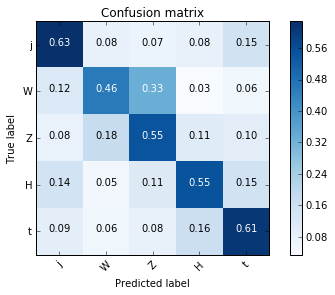

Normalized confusion matrix
[[ 0.63  0.08  0.07  0.08  0.15]
 [ 0.12  0.46  0.33  0.03  0.06]
 [ 0.08  0.18  0.55  0.11  0.1 ]
 [ 0.14  0.05  0.11  0.55  0.15]
 [ 0.09  0.06  0.08  0.16  0.61]]


In [21]:
cm = metrics.confusion_matrix(sgd.predict(trainData[100000:]), targetData[100000:])
plt.figure()
targetNames = ['j', 'W', 'Z', 'H', 't']
plot_confusion_matrix(cm.T, targetNames, normalize=True)
plt.show()

In [22]:
print sgd.score(trainData[100000:], targetData[100000:])


0.556535125526


In [18]:
probsTT = sgd.predict_proba(arrayTT)
probsWW = sgd.predict_proba(arrayWW)
probsZZ = sgd.predict_proba(arrayZZ)
probsHH = sgd.predict_proba(arrayHH)
probsJJ = sgd.predict_proba(arrayJJ)


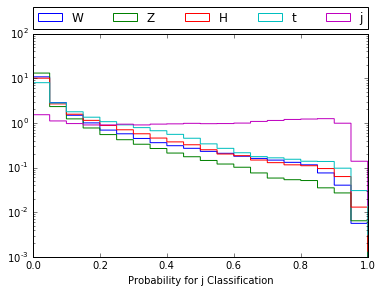

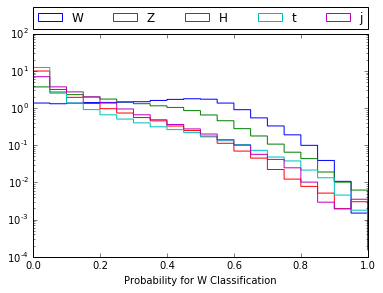

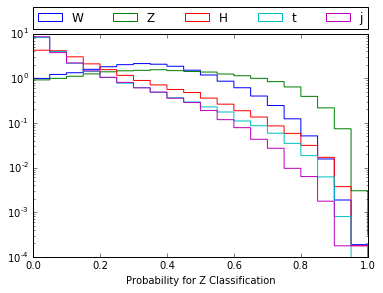

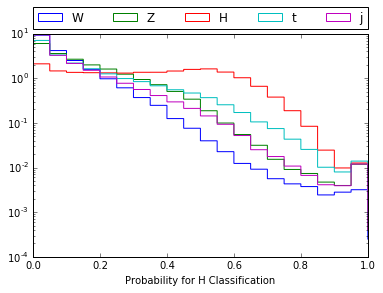

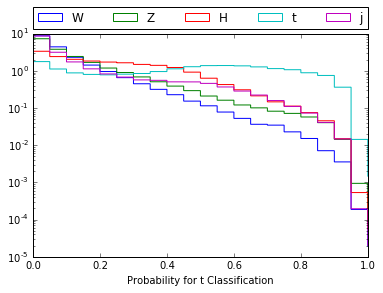

In [19]:

plt.close()
plt.figure()
plt.xlabel('Probability for j Classification')
plt.hist(probsWW.T[0], bins=20, range=(0,1), label='W', histtype='step',normed=True, log=True)
plt.hist(probsZZ.T[0], bins=20, range=(0,1), label='Z', histtype='step',normed=True, log=True)
plt.hist(probsHH.T[0], bins=20, range=(0,1), label='H', histtype='step',normed=True, log=True)
plt.hist(probsTT.T[0], bins=20, range=(0,1), label='t', histtype='step',normed=True, log=True)
plt.hist(probsJJ.T[0], bins=20, range=(0,1), label='j', histtype='step',normed=True, log=True)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=5, mode="expand", borderaxespad=0.)
plt.show()

plt.xlabel('Probability for W Classification')
plt.hist(probsWW.T[1], bins=20, range=(0,1), label='W', histtype='step',normed=True, log=True)
plt.hist(probsZZ.T[1], bins=20, range=(0,1), label='Z', histtype='step',normed=True, log=True)
plt.hist(probsHH.T[1], bins=20, range=(0,1), label='H', histtype='step',normed=True, log=True)
plt.hist(probsTT.T[1], bins=20, range=(0,1), label='t', histtype='step',normed=True, log=True)
plt.hist(probsJJ.T[1], bins=20, range=(0,1), label='j', histtype='step',normed=True, log=True)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=5, mode="expand", borderaxespad=0.)
plt.show()

plt.xlabel('Probability for Z Classification')
plt.hist(probsWW.T[2], bins=20, range=(0,1), label='W', histtype='step',normed=True, log=True)
plt.hist(probsZZ.T[2], bins=20, range=(0,1), label='Z', histtype='step',normed=True, log=True)
plt.hist(probsHH.T[2], bins=20, range=(0,1), label='H', histtype='step',normed=True, log=True)
plt.hist(probsTT.T[2], bins=20, range=(0,1), label='t', histtype='step',normed=True, log=True)
plt.hist(probsJJ.T[2], bins=20, range=(0,1), label='j', histtype='step',normed=True, log=True)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=5, mode="expand", borderaxespad=0.)
plt.show()

plt.xlabel('Probability for H Classification')
plt.hist(probsWW.T[3], bins=20, range=(0,1), label='W', histtype='step',normed=True, log=True)
plt.hist(probsZZ.T[3], bins=20, range=(0,1), label='Z', histtype='step',normed=True, log=True)
plt.hist(probsHH.T[3], bins=20, range=(0,1), label='H', histtype='step',normed=True, log=True)
plt.hist(probsTT.T[3], bins=20, range=(0,1), label='t', histtype='step',normed=True, log=True)
plt.hist(probsJJ.T[3], bins=20, range=(0,1), label='j', histtype='step',normed=True, log=True)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=5, mode="expand", borderaxespad=0.)
plt.show()

plt.xlabel('Probability for t Classification')
plt.hist(probsWW.T[4], bins=20, range=(0,1), label='W', histtype='step',normed=True, log=True)
plt.hist(probsZZ.T[4], bins=20, range=(0,1), label='Z', histtype='step',normed=True, log=True)
plt.hist(probsHH.T[4], bins=20, range=(0,1), label='H', histtype='step',normed=True, log=True)
plt.hist(probsTT.T[4], bins=20, range=(0,1), label='t', histtype='step',normed=True, log=True)
plt.hist(probsJJ.T[4], bins=20, range=(0,1), label='j', histtype='step',normed=True, log=True)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=5, mode="expand", borderaxespad=0.)
plt.show()